<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques and Dealing With More Missing Values**


In this lab, I will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, I will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 28.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
# Task 1: Identify duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of full-row duplicate rows:", num_duplicates)

# Display the first few duplicate rows (optional)
print("\nSample duplicate rows:")
print(df[df.duplicated(keep=False)].head())

# Task 2: Remove duplicate rows
df = df.drop_duplicates()

# Verify removal
print("\nNumber of duplicates after removal:", df.duplicated().sum())
print("Dataset size after removing duplicates:", df.shape[0])


Number of full-row duplicate rows: 0

Sample duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAs

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
# Task 2: Identify missing values in 'CodingActivities'
missing_count = df['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities': {missing_count}")


Number of missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
# Task 3: Impute missing values with forward-fill
# Forward-fill missing values
df['CodingActivities'] = df['CodingActivities'].ffill()

# Verify missing values are handled
missing_count_after = df['CodingActivities'].isnull().sum()
print(f"Number of missing values in 'CodingActivities' after forward-fill: {missing_count_after}")


Number of missing values in 'CodingActivities' after forward-fill: 0


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, I’ll identify ConvertedCompYearly or similar columns, which contain compensation information.


In [14]:
# Task 4: Identify compensation-related column
# Identify all columns containing 'comp'
comp_columns = [col for col in df.columns if 'comp' in col.lower()]

print(f"Found {len(comp_columns)} compensation-related columns:")
for col in comp_columns:
    print(f"  - {col}")

Found 3 compensation-related columns:
  - CompTotal
  - AIComplex
  - ConvertedCompYearly


In [15]:
# Remove 'AIComplex' from the compensation columns list
comp_columns = [col for col in comp_columns if col != 'AIComplex']

print("Updated compensation-related columns:")
print(comp_columns)
print(f"\nTotal compensation columns: {len(comp_columns)}")

Updated compensation-related columns:
['CompTotal', 'ConvertedCompYearly']

Total compensation columns: 2


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, I will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


     ConvertedCompYearly  ConvertedCompYearly_MinMax
72                7322.0                    0.000450
374              30074.0                    0.001850
379              91295.0                    0.005616
385              53703.0                    0.003303
389             110000.0                    0.006766


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, I’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [17]:
# Calculate mean and standard deviation
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()

# Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_comp) / std_comp

# Display first few rows
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


     ConvertedCompYearly  ConvertedCompYearly_Zscore
72                7322.0                   -0.422117
374              30074.0                   -0.300290
379              91295.0                    0.027521
385              53703.0                   -0.173767
389             110000.0                    0.127678


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


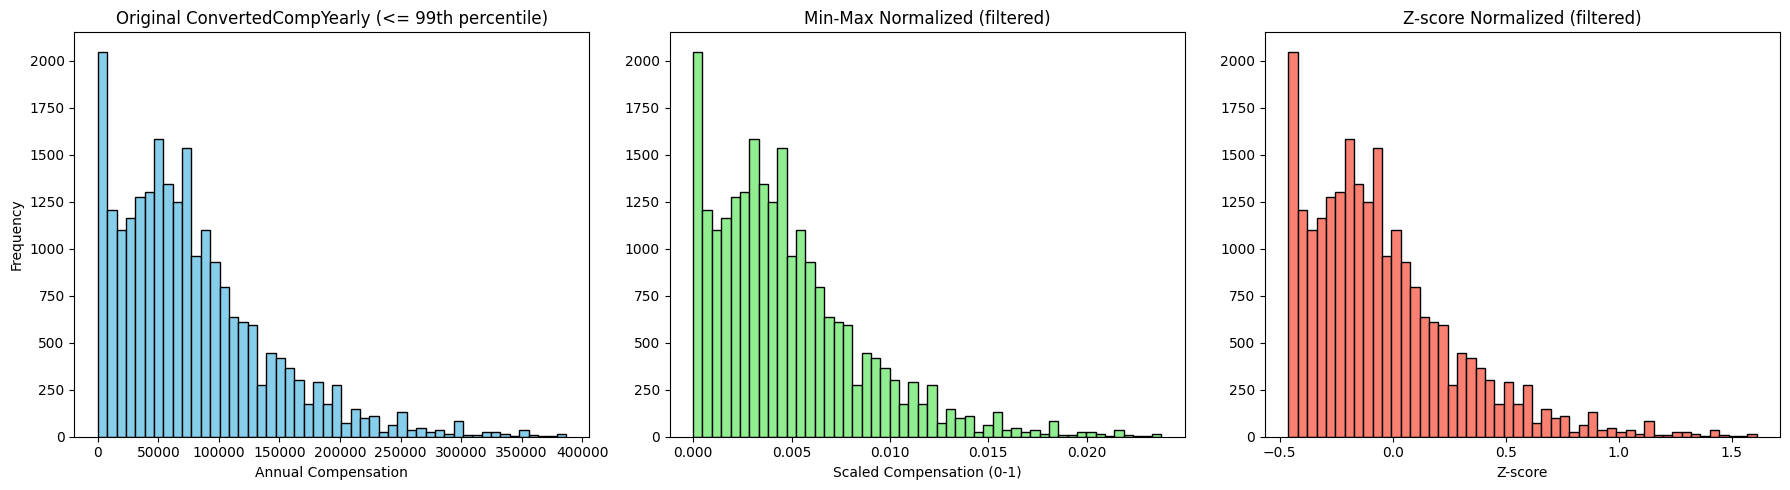

In [18]:
### import matplotlib.pyplot as plt

# Filter out extreme outliers (above 99th percentile)
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
df_filtered = df[df['ConvertedCompYearly'] <= upper_limit]

plt.figure(figsize=(18, 5))

# Original (filtered)
plt.subplot(1, 3, 1)
plt.hist(df_filtered['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Original ConvertedCompYearly (<= 99th percentile)')
plt.xlabel('Annual Compensation')
plt.ylabel('Frequency')

# Min-Max Normalized (filtered)
plt.subplot(1, 3, 2)
plt.hist(df_filtered['ConvertedCompYearly_MinMax'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Min-Max Normalized (filtered)')
plt.xlabel('Scaled Compensation (0-1)')

# Z-score Normalized (filtered)
plt.subplot(1, 3, 3)
plt.hist(df_filtered['ConvertedCompYearly_Zscore'], bins=50, color='salmon', edgecolor='black')
plt.title('Z-score Normalized (filtered)')
plt.xlabel('Z-score')
plt.tight_layout()

plt.show()

### Summary


In this lab, I practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
